# **Libraries used**

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adamax

# **Loading Dataset**

In [2]:
image_folder  = "Multi-class Weather Dataset"

In [3]:
# Subfolders and their labels
subfolders = [ 'Cloudy', 'Rain', 'Shine', 'Sunrise']
label_map = { subfolder: idx for idx, subfolder in enumerate(subfolders)}

# List of Images and Labels
images = []
labels = []

# Loading Dataset

for subfolder in subfolders:
    subfolder_path = os.path.join(image_folder, subfolder)
    for filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, (224,224))
            images.append(img_resized)
            labels.append(label_map[subfolder])

# Coverted to Numpy Arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the Images
images = images.astype('float32') / 255.0

# **Some Random Samples**

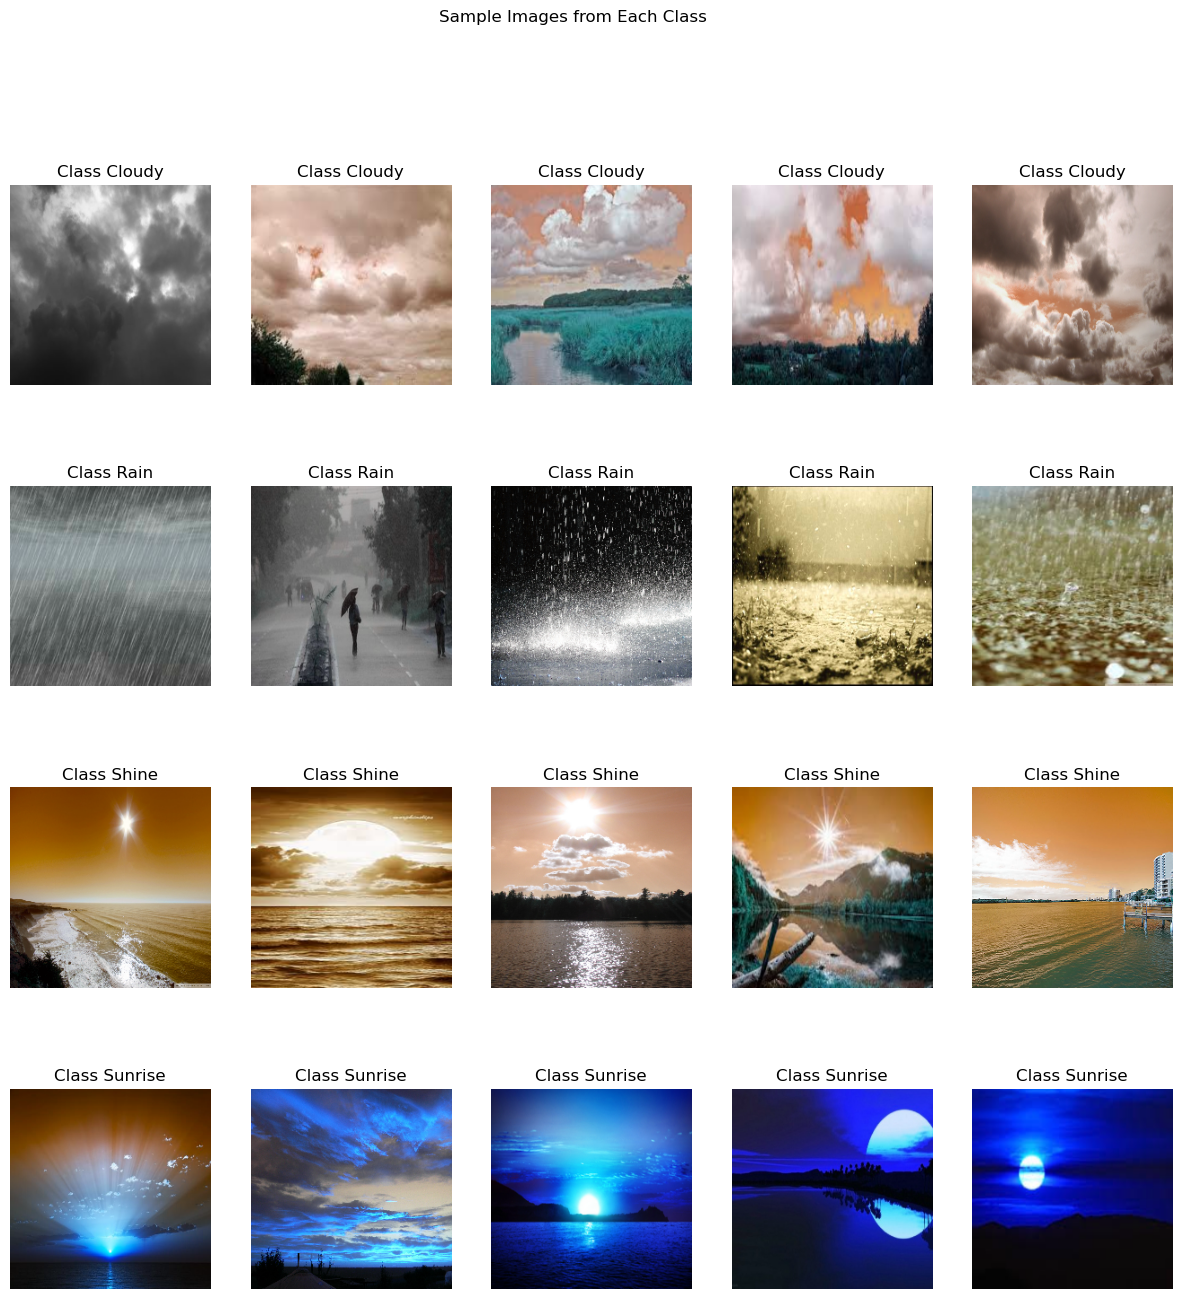

In [4]:
# Plot 5 images from each class
plt.figure(figsize = (15,15))
for i, subfolder in enumerate(subfolders):
    class_indices = np.where(labels == label_map[subfolder])[0]
    for j in range(5):
        plt.subplot(len(subfolders), 5, i*5 + j +1)
        plt.imshow(images[class_indices[j]])
        plt.title(f"Class {subfolder}")
        plt.axis('off')
plt.suptitle('Sample Images from Each Class')
plt.show()

# **Data Visualization**

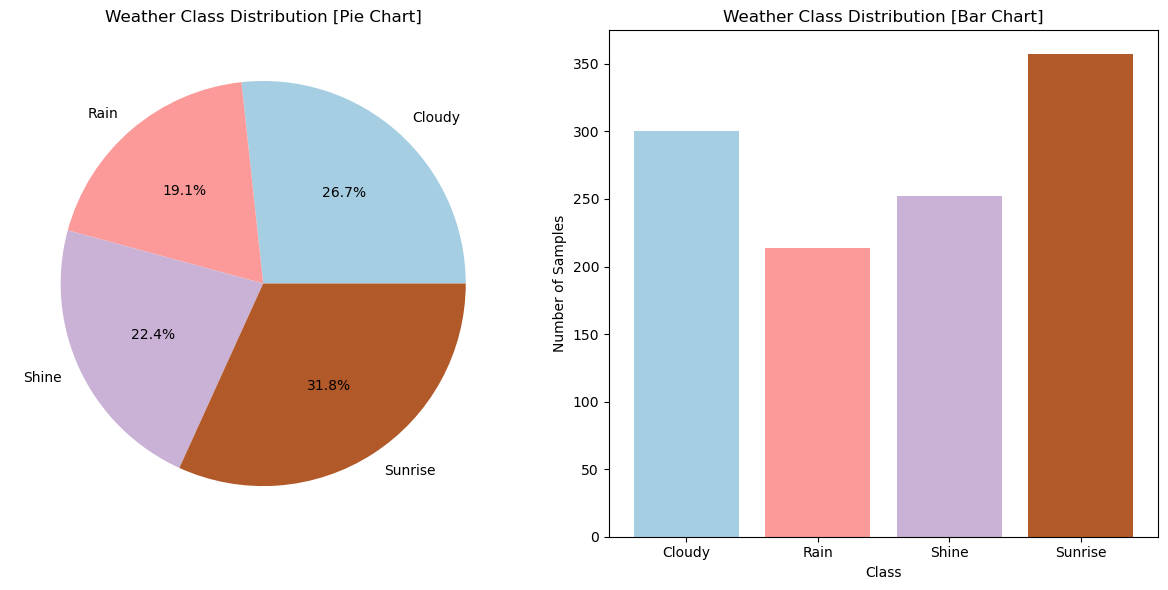

In [5]:
# Visual Representation for Class Distribution [ Pie Chart, Bar Chart]

class_counts = np.bincount(labels)
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
colors = plt.cm.Paired(np.linspace(0, 1, len(class_counts)))
plt.pie(class_counts, labels = subfolders, autopct = '%1.1f%%', colors = colors)
plt.title( 'Weather Class Distribution [Pie Chart]')

plt.subplot(1,2,2)
colors = plt.cm.Paired(np.linspace(0, 1, len(class_counts)))
plt.bar(subfolders, class_counts, color = colors)
plt.title('Weather Class Distribution [Bar Chart]')
plt.xlabel('Class')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()

In [6]:
# One-Hot Encode the labels

labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes = len(subfolders))

# **Data Splitting**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size = 0.2, stratify = labels_one_hot, random_state = 42)

In [8]:
print("Training data shape:", X_train.shape, "Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape, "Test labels shape:", y_test.shape)

Training data shape: (898, 224, 224, 3) Training labels shape: (898, 4)
Test data shape: (225, 224, 224, 3) Test labels shape: (225, 4)


# **Model Architecture ( Basic CNN)**

In [9]:
model = Sequential([
    Conv2D(64, (3,3), activation ='relu', input_shape = (224,224,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), activation ='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.1),
    Dense(len(subfolders), activation = 'softmax')
    
])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Model Layers**

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,188,804 (42.68 MB)

 Trainable params: 11,188,804 (42.68 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [11]:
model.compile(optimizer = 'adam', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs = 12, validation_data = (X_test, y_test))

Epoch 1/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.4378 - loss: 2.0488 - val_accuracy: 0.7022 - val_loss: 0.8087
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7313 - loss: 0.6439 - val_accuracy: 0.7733 - val_loss: 0.6438
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7732 - loss: 0.5830 - val_accuracy: 0.8444 - val_loss: 0.5597
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8844 - loss: 0.3070 - val_accuracy: 0.8133 - val_loss: 0.5149
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.8867 - loss: 0.3419 - val_accuracy: 0.8311 - val_loss: 0.4555
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.8704 - loss: 0.3353 - val_accuracy: 0.8533 - val_loss: 0.4970
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.8766 - loss: 0.3255 - val_accuracy: 0.8267 - val_loss: 0.5318
Epoch 8/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.9241 - loss: 0.1962 - val_accuracy: 0.8222 - val_los

# **Model Evaluation**

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 450ms/step - accuracy: 0.8654 - loss: 0.5746
Test accuracy: 0.8844444155693054
Test loss: 0.5258529186248779


In [14]:
# Classification Report

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=subfolders))

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 514ms/step
              precision    recall  f1-score   support

      Cloudy       0.76      0.87      0.81        60
        Rain       0.89      0.77      0.82        43
       Shine       0.89      0.84      0.87        50
     Sunrise       0.99      1.00      0.99        72

    accuracy                           0.88       225
   macro avg       0.88      0.87      0.87       225
weighted avg       0.89      0.88      0.88       225



# **Confusion Matrix**

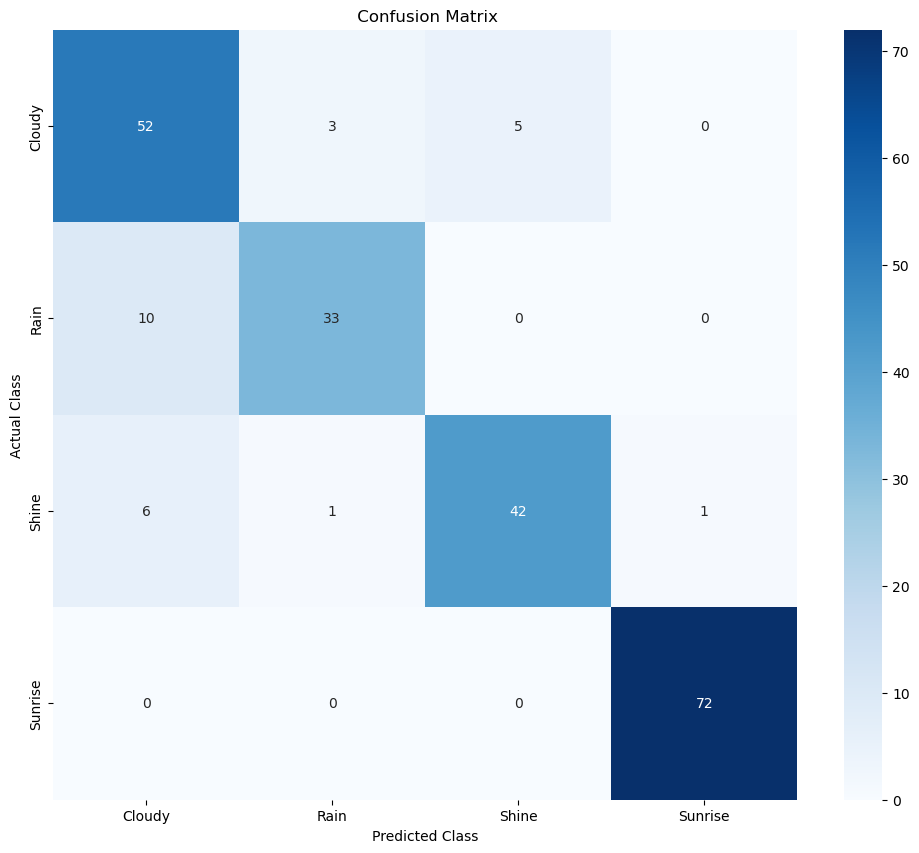

In [15]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (12,10))
sns.heatmap(conf_mat , annot =True, fmt = 'd', cmap = 'Blues', xticklabels = subfolders, yticklabels = subfolders)
plt.title(" Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

# **Plotting For Training and Validation Results**

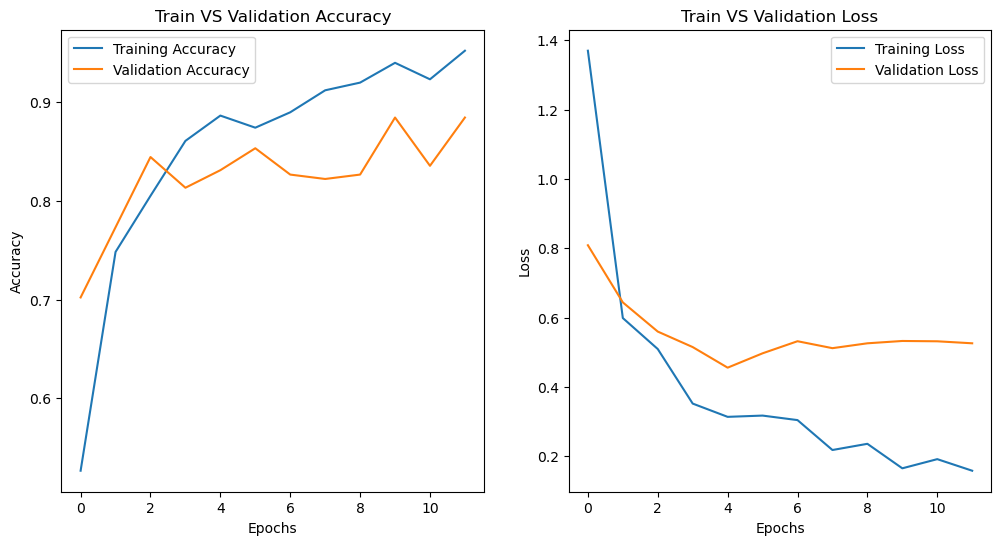

In [16]:
# Plotting for Training and Validation Results

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Train VS Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Train VS Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# **Some Random Predictions**

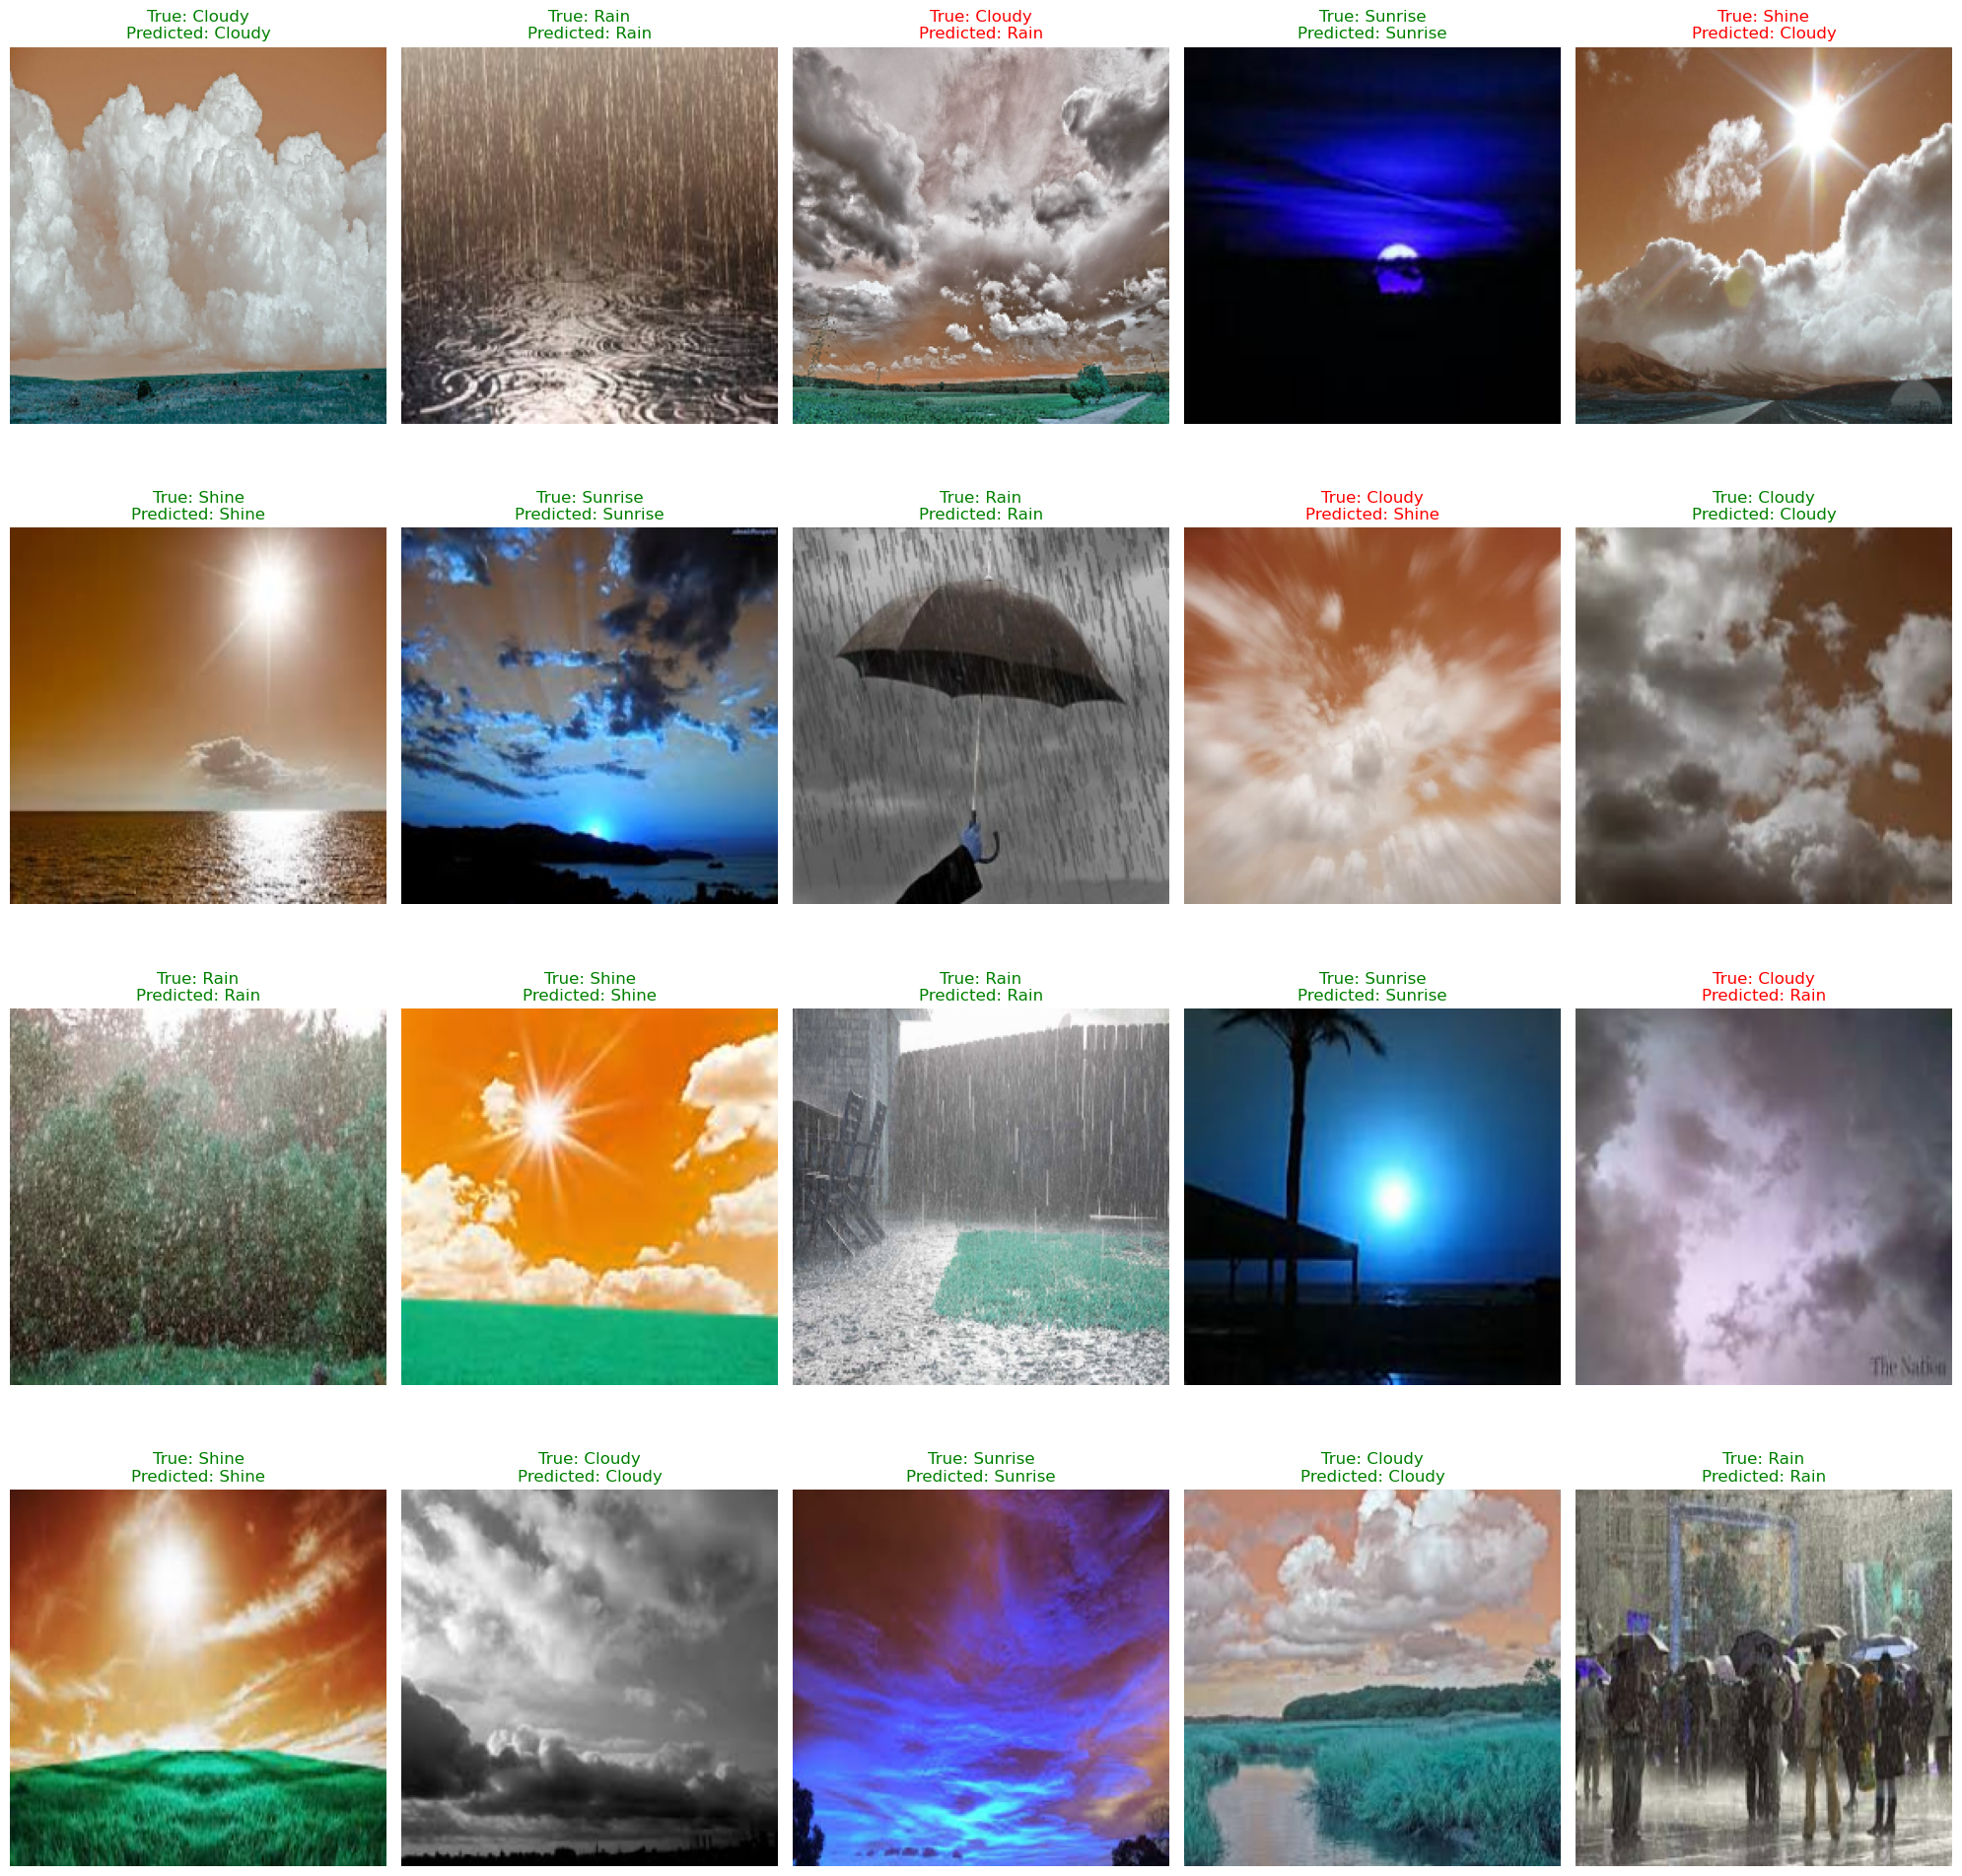

In [17]:
import random

num_samples = 20
rows = 4
wrong_predictions_indices =[]
for idx, (true_label, predicted_label) in enumerate(zip(y_true, y_pred)):
    if true_label != predicted_label:
        wrong_predictions_indices.append(idx)

random_indices = random.sample(range(len(X_test)), num_samples - rows)
random_wrong_indices = random.sample(wrong_predictions_indices, 4)
random_indices.extend(random_wrong_indices)
random_indices = sorted(random_indices)

plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
    plt.subplot(rows, int(num_samples / rows), i + 1)
    plt.imshow(X_test[idx])
    true_label = y_true[idx]
    true_class = subfolders[true_label]
    predicted_class = subfolders[y_pred[idx]]

    # color-code the correct predictions
    if true_class == predicted_class:
        predicted_color = 'green'
    else:
        predicted_color = 'red'
    plt.title(f'True: {true_class}\nPredicted: {predicted_class}', color=predicted_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Comparison**

## **Using 3 Pre-Trained Models [ VGG16, ResNet50, MobileNetV2]**

### Loading Pre-Trained Models

In [18]:
# Using 3 Pre-Trained Models for Comparizon


from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def build_model(base_model, num_classes=4):
    # Freeze the base model layers
    base_model.trainable = False
    
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),  # Replace MaxPooling2D with GlobalAveragePooling2D
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer for 4 classes
    ])
    return model

# Load pre-trained base models
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build full models
models = {
    'VGG16': build_model(base_model_vgg16),
    'ResNet50': build_model(base_model_resnet50),
    'MobileNetV2': build_model(base_model_mobilenetv2)
}

# **Compilation and Training of Models**

In [19]:
# Compiling models
models = {
    'VGG16': build_model(VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))),
    'ResNet50': build_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))),
    'MobileNetV2': build_model(MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
}

# Compile models
for name, model in models.items():
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Train models
histories = {}
for name, model in models.items():
    print(f"Training {name} model...")
    history = model.fit(X_train, y_train,
                        epochs=12,
                        validation_data=(X_test, y_test)
                        )
    histories[name] = history
    print(f"{name} training completed.")

Training VGG16 model...
Epoch 1/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 324s 11s/step - accuracy: 0.5227 - loss: 1.1407 - val_accuracy: 0.4578 - val_loss: 1.0843
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 343s 12s/step - accuracy: 0.8817 - loss: 0.3539 - val_accuracy: 0.6044 - val_loss: 0.9830
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 327s 11s/step - accuracy: 0.9082 - loss: 0.2492 - val_accuracy: 0.7067 - val_loss: 0.8631
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 298s 10s/step - accuracy: 0.9400 - loss: 0.1977 - val_accuracy: 0.7822 - val_loss: 0.7449
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 295s 10s/step - accuracy: 0.9528 - loss: 0.1567 - val_accuracy: 0.8178 - val_loss: 0.6491
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 284s 10s/step - accuracy: 0.9597 - loss: 0.1263 - val_accuracy: 0.8578 - val_loss: 0.5424
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 283s 10s/step - accuracy: 0.9590 - loss: 0.1340 - val_accuracy: 0.9156 - val_loss: 0.4564
Epoch 8/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 279s 10s/step - accuracy: 0.9636 - loss: 0

# **Evaluation of Models and Comparison**

In [20]:
results = {}
modelss = {
    'Basic CNN': model,
    'VGG16': models['VGG16'],
    'ResNet50': models['ResNet50'],
    'MobileNetV2': models['MobileNetV2']
} 

for name, model in modelss.items():
    print(f"Evaluating {name} model...")
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    results[name] = test_accuracy
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Optional: Sort and display results
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Ranking:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.4f}")

Evaluating Basic CNN model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 801ms/step - accuracy: 0.9285 - loss: 0.1676
Basic CNN Test Accuracy: 0.9244
Evaluating VGG16 model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 66s 8s/step - accuracy: 0.9637 - loss: 0.2015
VGG16 Test Accuracy: 0.9511
Evaluating ResNet50 model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5745 - loss: 0.9110
ResNet50 Test Accuracy: 0.5822
Evaluating MobileNetV2 model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 809ms/step - accuracy: 0.9285 - loss: 0.1676
MobileNetV2 Test Accuracy: 0.9244

Model Performance Ranking:
VGG16: 0.9511
Basic CNN: 0.9244
MobileNetV2: 0.9244
ResNet50: 0.5822


# **Plotting All Models**

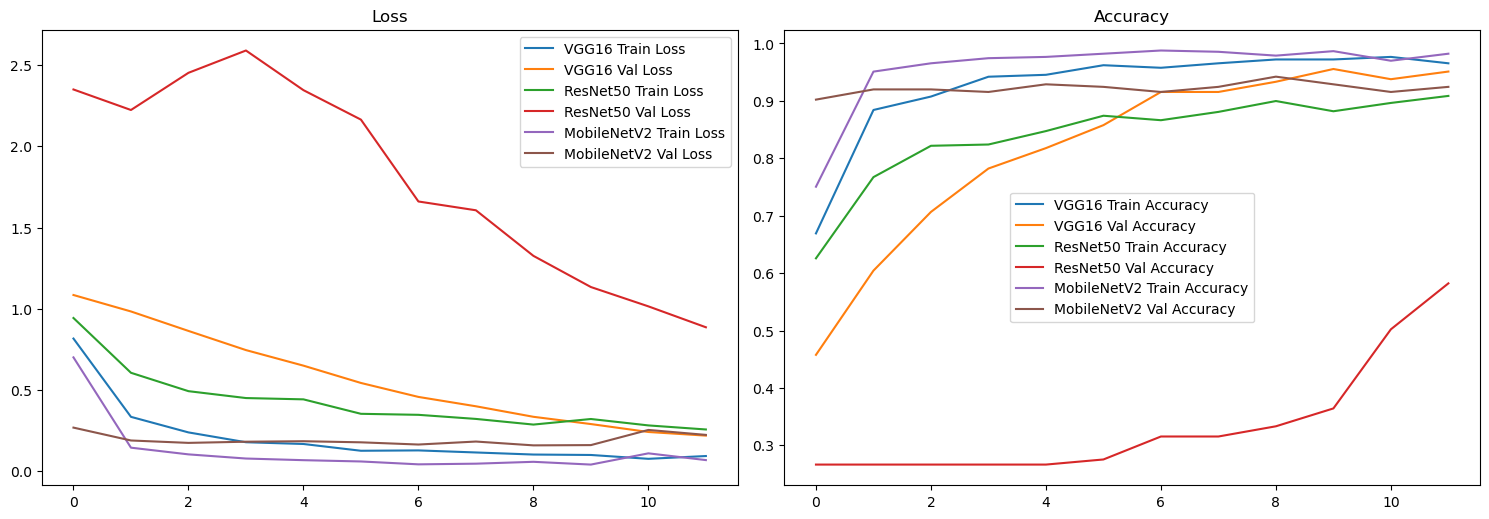

In [21]:
plt.figure(figsize=(15, 10))

for name, history in histories.items():
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label=f'{name} Train Loss')
    plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{name} Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

# **Confusion Matrix and Performance parameters for Each Model**

Confusion Matrix for VGG16 model:
8/8 ━━━━━━━━━━━━━━━━━━━━ 65s 8s/step


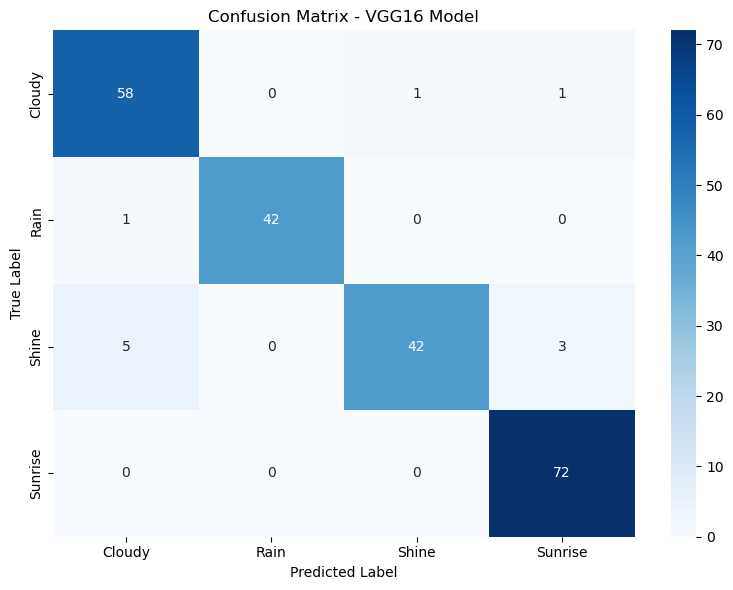


Classification Report for VGG16 model:
              precision    recall  f1-score   support

      Cloudy       0.91      0.97      0.94        60
        Rain       1.00      0.98      0.99        43
       Shine       0.98      0.84      0.90        50
     Sunrise       0.95      1.00      0.97        72

    accuracy                           0.95       225
   macro avg       0.96      0.95      0.95       225
weighted avg       0.95      0.95      0.95       225

Confusion Matrix for ResNet50 model:
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step


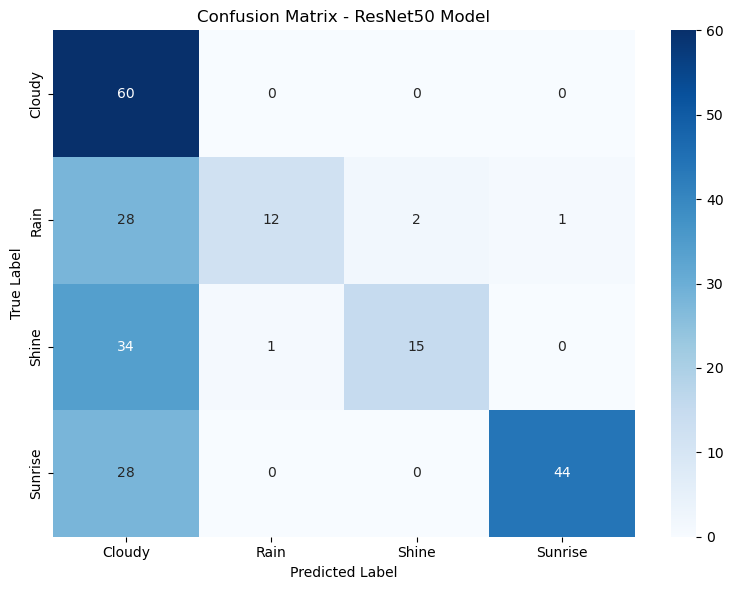


Classification Report for ResNet50 model:
              precision    recall  f1-score   support

      Cloudy       0.40      1.00      0.57        60
        Rain       0.92      0.28      0.43        43
       Shine       0.88      0.30      0.45        50
     Sunrise       0.98      0.61      0.75        72

    accuracy                           0.58       225
   macro avg       0.80      0.55      0.55       225
weighted avg       0.79      0.58      0.57       225

Confusion Matrix for MobileNetV2 model:
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


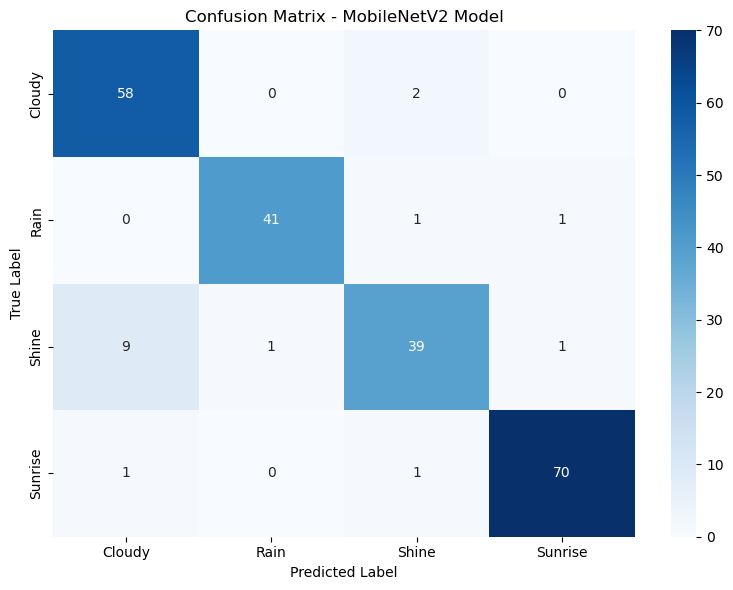


Classification Report for MobileNetV2 model:
              precision    recall  f1-score   support

      Cloudy       0.85      0.97      0.91        60
        Rain       0.98      0.95      0.96        43
       Shine       0.91      0.78      0.84        50
     Sunrise       0.97      0.97      0.97        72

    accuracy                           0.92       225
   macro avg       0.93      0.92      0.92       225
weighted avg       0.93      0.92      0.92       225



In [22]:
for name, model in models.items():
    print(f"Confusion Matrix for {name} model:")
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Convert one-hot encoded predictions to class labels
    predicted_labels = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=subfolders, 
                yticklabels=subfolders)
    
    plt.title(f'Confusion Matrix - {name} Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Optional: Print classification report for more detailed metrics
    from sklearn.metrics import classification_report
    print(f"\nClassification Report for {name} model:")
    print(classification_report(true_labels, predicted_labels, target_names=subfolders))